Pour permettre au banque de faire face au fraude nous allons mettre place un modèle capable de détecter les fraude par carte de credit

In [3]:
# Ouverture du dataset

import pandas as pd
import numpy as np

data =  pd.read_csv("Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Nous allons supprimer la colonne "CustomerID" car elle ne nous sert pas

In [4]:
df = data.drop(["CustomerID"], axis=1)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [6]:
# Connaitre la taille du dataset
df.shape

(200, 4)

In [7]:
# vérifions si il y a des valeurs manquantes 
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

il n'y a pas de valeurs manquantes dans le dataset

In [8]:
# Encodage de la variable qualitative
df_copy = df
df_quali =  df_copy.select_dtypes(object)
df_quali

,Gender
0,Male
1,Male
2,Female
3,Female
4,Female
...,...
195,Female
196,Female
197,Male
198,Male


In [9]:
# listes des variables qualitatives et quantitatives 
df_quali = ["Gender"]
df_quanti = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

In [10]:
# fonction pour encoder la variable qualitative
def encod_var_qualitative(df_copy):
    df_copy['Gender'].replace({'Male': 0, 'Female': 1}, inplace=True)
    return df_copy

In [11]:
data_encoded = encod_var_qualitative(df_copy)
data_encoded

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


Notre dataset ne contient plus de variables qualitative car dans Gender la valeur Male equivaut à 0 et Female à 1. l'intégrité des données a été vérifié

Nous allons maintenant commencé la visualisation des données 

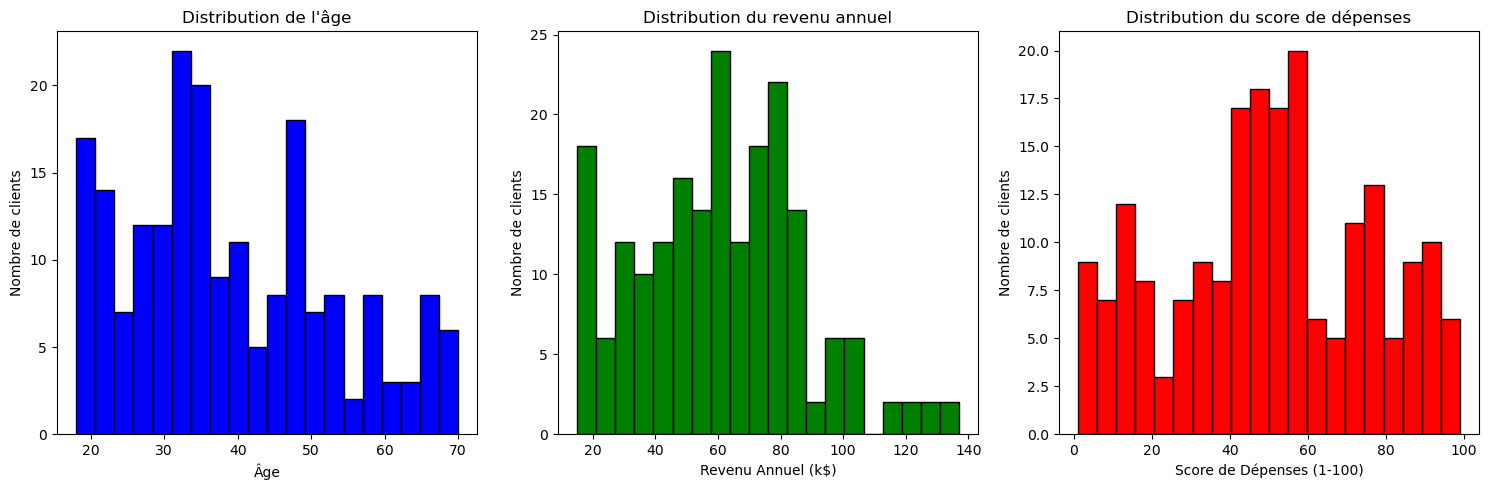

In [14]:
# Créez une figure avec trois sous-graphiques pour les caractéristiques Age, Revenu Annuel et Score de Dépenses
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Histogramme de l'âge
axes[0].hist(df_copy['Age'], bins=20, color='blue', edgecolor='black')
axes[0].set_title('Distribution de l\'âge')
axes[0].set_xlabel('Âge')
axes[0].set_ylabel('Nombre de clients')

# Histogramme du revenu annuel
axes[1].hist(data['Annual Income (k$)'], bins=20, color='green', edgecolor='black')
axes[1].set_title('Distribution du revenu annuel')
axes[1].set_xlabel('Revenu Annuel (k$)')
axes[1].set_ylabel('Nombre de clients')

# Histogramme du score de dépenses
axes[2].hist(data['Spending Score (1-100)'], bins=20, color='red', edgecolor='black')
axes[2].set_title('Distribution du score de dépenses')
axes[2].set_xlabel('Score de Dépenses (1-100)')
axes[2].set_ylabel('Nombre de clients')

plt.tight_layout()
plt.show()


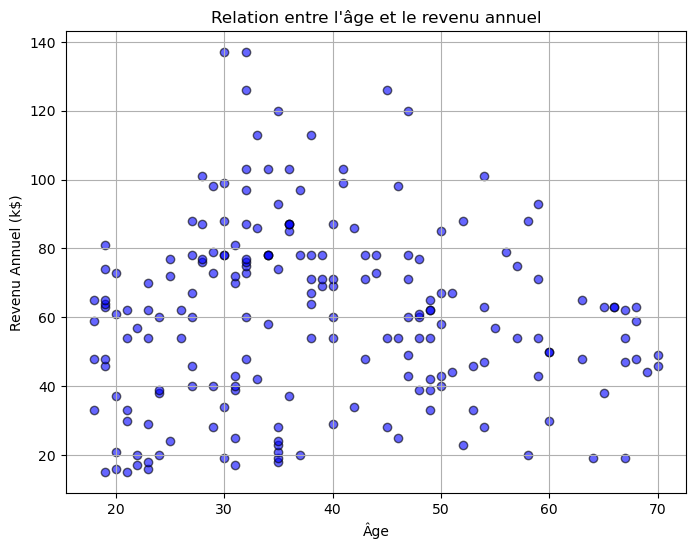

In [15]:
# Création des nuages de points pour montrer la rélation entre l'age des clients et leurs revenus annuels

# Extraire les données de l'âge et du revenu annuel
age = df_copy['Age']
annual_income = df_copy['Annual Income (k$)']

# Créer un nuage de points
plt.figure(figsize=(8, 6))
plt.scatter(age, annual_income, c='b', marker='o', edgecolor='k', alpha=0.6)
plt.title('Relation entre l\'âge et le revenu annuel')
plt.xlabel('Âge')
plt.ylabel('Revenu Annuel (k$)')

plt.grid(True)
plt.show()


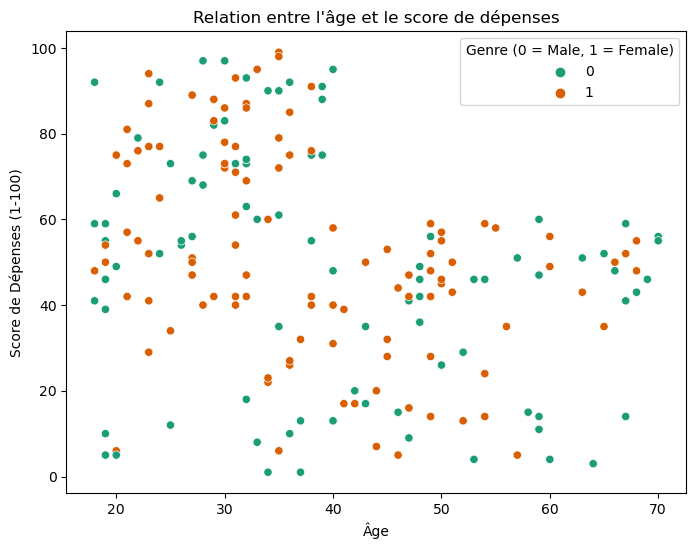

In [22]:
# Création des nuages de points pour montrer la rélation entre l'age des clients et leurs score de dépense

import matplotlib.pyplot as plt
import seaborn as sns



# Créez un nuage de points pour montrer la relation entre l'âge et le score de dépenses
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df_copy, hue='Gender', palette='Dark2')
plt.title('Relation entre l\'âge et le score de dépenses')
plt.xlabel('Âge')
plt.ylabel('Score de Dépenses (1-100)')
plt.legend(title='Genre (0 = Male, 1 = Female)', loc='upper right')
plt.show()



In [23]:
# Créez un ensemble de sous-graphiques pour les trois caractéristiques
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Boîte à moustaches pour l'âge
sns.boxplot(df_copy['Age'], ax=axes[0], color='blue')
axes[0].set_title('Boîte à moustaches de l\'âge')

# Boîte à moustaches pour le revenu annuel
sns.boxplot(df_copy['Annual Income (k$)'], ax=axes[1], color='green')
axes[1].set_title('Boîte à moustaches du revenu annuel')

# Boîte à moustaches pour le score de dépenses
sns.boxplot(df_copy['Spending Score (1-100)'], ax=axes[2], color='red')
axes[2].set_title('Boîte à moustaches du score de dépenses')

plt.tight_layout()
plt.show()



<Figure size 640x480 with 0 Axes>